## Evaluating Regression Models Exercises

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from pydataset import data
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split

from evaluate import lr_model_with_residuals
from evaluate import plot_residuals
from evaluate import regression_errors
from evaluate import baseline_mean_errors
from evaluate import better_than_baseline

#### Acquire and Split the Data

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
train_val, test = train_test_split(df, train_size = 0.8, random_state=123)
train, validate = train_test_split(train_val, train_size = 0.7, random_state=123)
train.shape, validate.shape, test.shape

((136, 7), (59, 7), (49, 7))

---

#### Explore the data and write code for functions

In [4]:
train = train[['total_bill', 'tip']]
train.head()

,total_bill,tip
19,16.97,3.50
173,7.25,5.15
119,12.43,1.80
29,21.70,4.30
238,32.83,1.17


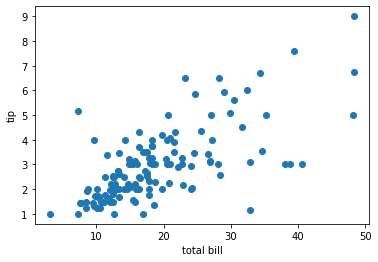

In [5]:
plt.scatter(train.total_bill, train.tip)
plt.ylabel('tip')
plt.xlabel('total bill')
plt.show()

In [6]:
baseline = train.tip.mean()
baseline

2.9469852941176478

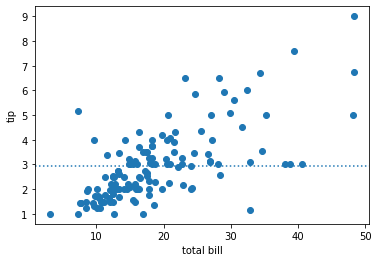

In [7]:
plt.scatter(train.total_bill, train.tip)
plt.axhline(baseline, ls=':')
plt.ylabel('tip')
plt.xlabel('total bill')
plt.show()

In [8]:
lr = LinearRegression(normalize=True)

In [9]:
lr.fit(train[['total_bill']], train.tip)

LinearRegression(normalize=True)

In [10]:
train['yhat'] = lr.predict(train[['total_bill']])

In [11]:
train.head()

,total_bill,tip,yhat
19,16.97,3.50,2.741254
173,7.25,5.15,1.642824
119,12.43,1.80,2.228201
29,21.70,4.30,3.275778
238,32.83,1.17,4.533548


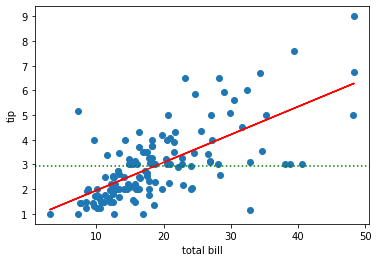

In [12]:
plt.scatter(train.total_bill, train.tip)
plt.axhline(baseline, ls=':', color='green')
plt.plot(train.total_bill, train.yhat, color='red')
plt.ylabel('tip')
plt.xlabel('total bill')
plt.show()

In [13]:
train['yhat_baseline'] = baseline
train['residual'] = train['yhat'] - train['tip']
train['residual_baseline'] = train['yhat_baseline'] - train['tip']
train.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline
19,16.97,3.50,2.741254,2.946985,-0.758746,-0.553015
173,7.25,5.15,1.642824,2.946985,-3.507176,-2.203015
119,12.43,1.80,2.228201,2.946985,0.428201,1.146985
29,21.70,4.30,3.275778,2.946985,-1.024222,-1.353015
238,32.83,1.17,4.533548,2.946985,3.363548,1.776985


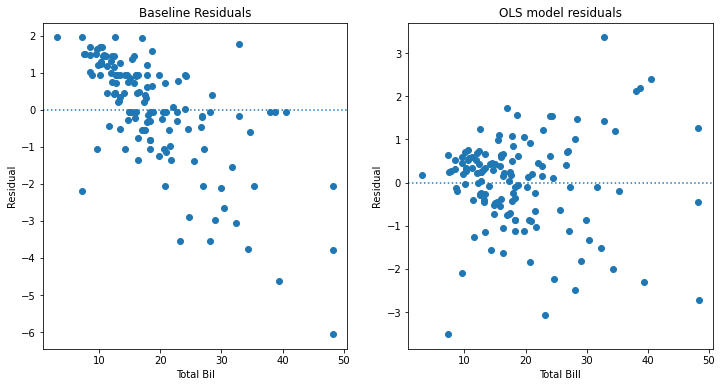

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(train.total_bill, train.residual_baseline)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bil')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(train.total_bill, train.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('OLS model residuals')

In [15]:
train['residual^2'] = train.residual**2
train['residual_baseline^2'] = train.residual_baseline**2
train.head()

,total_bill,tip,yhat,yhat_baseline,residual,residual_baseline,residual^2,residual_baseline^2
19,16.97,3.50,2.741254,2.946985,-0.758746,-0.553015,0.575695,0.305825
173,7.25,5.15,1.642824,2.946985,-3.507176,-2.203015,12.300284,4.853274
119,12.43,1.80,2.228201,2.946985,0.428201,1.146985,0.183356,1.315575
29,21.70,4.30,3.275778,2.946985,-1.024222,-1.353015,1.049030,1.830649
238,32.83,1.17,4.533548,2.946985,3.363548,1.776985,11.313458,3.157677


In [16]:
SSE_baseline = train['residual_baseline^2'].sum()
MSE_baseline = SSE_baseline/len(train)
RMSE_baseline =  sqrt(MSE_baseline)
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

SSE Baseline = 286.4
MSE baseline =  2.1
RMSE baseline =  1.5


In [11]:
SSE = train['residual^2'].sum()
MSE = SSE/len(train)
RMSE = sqrt(MSE)
TSS = train['residual_baseline^2'].sum()
ESS = TSS - SSE
print('SSE =', "{:.1f}".format(SSE))
print("MSE = ", "{:.1f}".format(MSE))
print("RMSE = ", "{:.1f}".format(RMSE))
print("TSS = ", "{:.1f}".format(TSS))
print("ESS = ", "{:.1f}".format(ESS))

SSE = 153.5
MSE =  1.1
RMSE =  1.1
TSS =  286.4
ESS =  132.9


In [13]:
float(SSE)

153.53663973018624

In [18]:
print('=============================')
print('Model Performance Evaluation:')
print('-----------------------------')
if SSE < SSE_baseline:
    print('The model performs better than baseline')
else:
    print('The model does not perform better than baseline')

Model Performance Evaluation:
-----------------------------
The model performs better than baseline


---

### Test the functions from the evaluate.py file
- Restart the Kernel

- Run the imports cell at the top of the notebook

- Run the acquire and split cells at the top of the notebook

- Run from top to bottom starting here

In [4]:
#this function takes in the df = 'train', the x_column = 'total_bill', and the y_column = 'tip'
train = lr_model_with_residuals(train, 'total_bill', 'tip')
train.head()
#this function separates the x and y columns from the original df then adds a baseline column('yhat_baseline'), 
#creates a linear regression model, makes predictions with the model and adds them in a new column('yhat'), 
#calculates the residuals for the baseline and the model and adds all the corresponding columns 
#with the calculated values and outputs the new df

,total_bill,tip,yhat_baseline,yhat,residual,residual_baseline,residual^2,residual_baseline^2
19,16.97,3.50,2.946985,2.741254,-0.758746,-0.553015,0.575695,0.305825
173,7.25,5.15,2.946985,1.642824,-3.507176,-2.203015,12.300284,4.853274
119,12.43,1.80,2.946985,2.228201,0.428201,1.146985,0.183356,1.315575
29,21.70,4.30,2.946985,3.275778,-1.024222,-1.353015,1.049030,1.830649
238,32.83,1.17,2.946985,4.533548,3.363548,1.776985,11.313458,3.157677


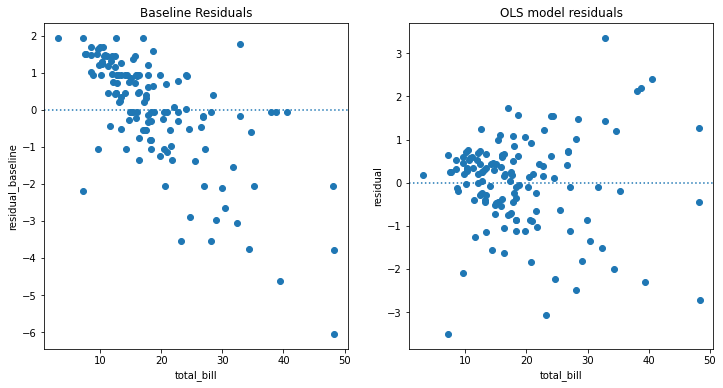

In [5]:
#
plot_residuals(train, 'total_bill', 'residual_baseline', 'residual')

In [6]:
regression_errors(train, 'residual^2', 'residual_baseline^2')

SSE: 153.5
MSE: 1.1
RMSE: 1.1
TSS: 286.4
ESS: 132.9


In [7]:
baseline_mean_errors(train, 'residual_baseline^2')

SSE Baseline = 286.4
MSE baseline =  2.1
RMSE baseline =  1.5


In [8]:
better_than_baseline(train, 'residual^2', 'residual_baseline^2')

Model Performance Evaluation:
-----------------------------
The model performs better than baseline
